In [1]:
import pandas as pd
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import Dataset, DataLoader, TensorDataset, Subset

import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime
import random

In [2]:
df = pd.read_csv("final_df.csv", index_col = 0, parse_dates = True)

In [3]:
weights_df = pd.read_csv('weights.csv')
weights = weights_df[['Symbol', 'Portfolio%']]

In [4]:
import pandas as pd

# Assuming your DataFrames are named weights and df
# Get the list of stock symbols from df columns
stock_symbols = list(df.columns)

# Filter weights based on stock symbols in the portfolio
weights_filtered = weights[weights['Symbol'].isin(stock_symbols)].copy()  # Use .copy() to avoid warnings on a slice

# Ensure weights_filtered has a 'weights' column (if not present)
if 'weights' not in weights_filtered.columns:
    weights_filtered['weights'] = pd.Series(dtype=float)  # Initialize an empty float column

# Convert weights from percentages to numeric values and normalize
weights_filtered['weights'] = weights_filtered['Portfolio%'].str.rstrip('%').astype(float) / 100
weights_filtered['weights'] /= weights_filtered['weights'].sum()

# Create a DataFrame with symbols and weights
final_weights_df = pd.DataFrame({'Symbol': weights_filtered['Symbol'], 'weights': weights_filtered['weights']})


In [9]:
final_weights_df

,Symbol,weights
0,MSFT,0.095496
1,AAPL,0.073966
2,NVDA,0.065117
3,AMZN,0.051248
8,LLY,0.018756
...,...,...
495,DVA,0.000264
496,CMA,0.000264
497,BIO,0.000264
498,RL,0.000264


In [5]:
missing_symbols = set(stock_symbols) -  set(weights_filtered['Symbol'])
df = df.drop(missing_symbols, axis=1)

In [6]:
log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()

In [250]:
import pandas as pd

rolling_window_size = 180

# Assuming 'log_returns' is a pandas DataFrame of log returns

# Calculate exponentially weighted moving mean and standard deviation for each stock
rolling_mean = log_returns.ewm(span=rolling_window_size, adjust=True).mean()
rolling_std = log_returns.ewm(span=rolling_window_size, adjust=True).std()

# Standardize the log returns
standardized_log_returns = (log_returns - rolling_mean) / rolling_std

# Optional: Drop the initial rows where the rolling mean and std might not be meaningful
standardized_log_returns = standardized_log_returns.dropna(how='all')


In [251]:
standardized_log_returns

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,AON,AOS,APA,APD,APH,ARE,ATO,AVB,AVY,AXON
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-10,0.703178,0.703178,-0.703178,-0.703178,0.703178,-0.703178,-0.703178,-0.703178,0.703178,0.703178,...,0.703178,0.703178,-0.703178,-0.703178,-0.703178,-0.703178,0.703178,0.703178,0.703178,-0.703178
2012-12-11,0.771156,1.046616,0.481660,-0.632857,1.121256,-1.136714,0.912187,0.148740,1.105857,1.076706,...,1.144712,-0.477596,0.937129,-0.487224,1.051324,-1.078812,1.020013,0.873194,0.037879,0.486355
2012-12-12,0.330469,-0.039003,-0.825185,0.534894,-0.636529,0.750869,-1.193155,-0.266551,-1.058730,-1.073724,...,0.264992,0.018031,0.806855,-1.192558,-1.018795,-0.757530,-0.880482,1.017726,-1.175924,-1.412920
2012-12-13,-1.172953,-0.610900,-1.161654,-0.929810,-1.064245,-1.338176,-1.201723,-0.600804,0.348541,-0.976981,...,0.362283,0.741249,-0.506861,0.404805,-1.277521,-1.288333,-0.681796,-0.634796,-1.015971,-0.971664
2012-12-14,-0.269692,-1.274602,-0.145139,-0.847013,0.722370,1.845921,-0.536054,-0.505837,-0.349940,0.644079,...,-0.922365,-0.938453,-0.438805,-0.818480,-0.708950,-1.175802,0.429010,0.576485,-0.035409,0.432787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.169468,-0.507884,0.353970,-0.239357,1.133353,-0.208731,0.188393,0.564485,0.615125,0.104680,...,0.904161,0.029086,0.056464,0.249083,0.472354,-0.406018,0.854487,0.193685,-0.478805,0.271442
2023-12-26,0.013730,-0.293735,0.093197,-0.247135,-0.331880,-0.132680,0.474682,0.930844,0.482088,0.407856,...,-0.417660,-0.010746,1.631014,0.439019,0.261733,0.381620,0.649073,0.299451,0.026659,-0.274497
2023-12-27,-0.077676,-0.029482,0.357219,0.046156,-0.024014,-0.273959,0.076310,-0.164176,-0.281591,-0.078015,...,0.145666,0.139309,-0.129960,0.183296,-0.167208,0.000430,0.061607,0.410494,0.224526,0.059066


In [7]:
rolling_window_size = 180

# Calculate rolling mean and standard deviation for each stock
rolling_mean = log_returns.rolling(window=rolling_window_size).mean()
rolling_std = log_returns.rolling(window=rolling_window_size).std()

# Standardize the log returns
standardized_log_returns = (log_returns - rolling_mean) / rolling_std

# Optional: Drop the initial rows where the rolling mean and std are NaN
# This will happen for the first (rolling_window_size - 1) days
standardized_log_returns = standardized_log_returns.dropna(how='all')


In [8]:
standardized_log_returns

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-19,0.542996,-0.678708,-0.953759,-0.263697,-0.662851,-0.233889,-0.046894,0.399195,0.747233,-0.049537,...,-0.445559,0.239562,-0.637325,-0.909339,0.405345,-0.525853,-0.230615,-0.160735,-0.667505,-0.321215
2003-09-22,-0.790397,-1.069656,-1.101359,-0.651368,-1.389027,-1.263047,-1.101246,-0.375071,-0.923898,-0.937883,...,-1.301748,-1.349130,0.406906,-0.731013,-0.850597,-0.211802,-0.649860,-0.460877,0.397180,-1.497245
2003-09-23,0.237713,0.585058,0.444867,-0.342749,-0.341847,1.175969,0.609178,0.350044,-1.167454,1.211976,...,0.594348,1.133452,1.163716,0.053394,1.977212,0.559254,0.796784,1.019408,1.289494,0.507965
2003-09-24,-2.023729,-2.261566,-1.411570,-1.457877,1.382608,-0.937846,-1.784668,-0.121888,-0.652089,-1.351294,...,-1.217528,-1.860882,-0.658730,-1.221216,-0.336230,-0.985742,-0.412345,-1.011548,0.075354,-1.440857
2003-09-25,-0.363163,-1.894101,-0.019452,0.747561,0.521885,0.648617,-0.165993,-0.331699,-0.431617,-0.425731,...,0.271268,0.192244,-2.195833,-0.349906,-0.095798,-0.972278,0.575741,-1.212932,-0.974038,-1.133699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.260340,-0.539718,0.384127,-0.305922,1.215987,-0.246148,0.238621,0.564678,0.623433,0.143380,...,1.166827,0.427147,0.198145,0.464003,-0.118010,0.807993,0.167954,0.023014,0.568264,0.583703
2023-12-26,0.096050,-0.320603,0.122746,-0.315870,-0.337166,-0.173044,0.537462,0.955572,0.478389,0.486955,...,-0.174692,-0.158230,0.420361,0.507960,0.387337,0.326017,0.198875,0.192923,0.528859,0.835800
2023-12-27,0.001149,-0.042092,0.379524,0.003563,-0.005958,-0.320770,0.131252,-0.168992,-0.334281,-0.060437,...,0.905435,-0.094695,-0.260448,0.221173,-0.161709,-0.921549,-0.275926,0.424318,-0.139769,0.058273


In [9]:
# Ensure the order of final_weights_df matches the columns in log_returns
final_weights_df_sorted = final_weights_df.set_index('Symbol').reindex(log_returns.columns).reset_index()

# Extract the weights into a NumPy array, now aligned with the log_returns columns
weights_vector = final_weights_df_sorted['weights'].values

# Convert log_returns DataFrame to a NumPy array
log_returns_matrix = log_returns.values

# Calculate portfolio returns
portfolio_returns = np.dot(log_returns_matrix, weights_vector)

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Calculate kurtosis using scipy (excess kurtosis, Fisher's definition, subtracts 3)
portfolio_kurtosis = kurtosis(portfolio_returns, fisher=True)

# Calculate kurtosis using pandas (excess kurtosis by default)
# portfolio_kurtosis = portfolio_returns.kurt()

print(f"Portfolio Kurtosis: {portfolio_kurtosis}")


Portfolio Kurtosis: 11.21505958977071


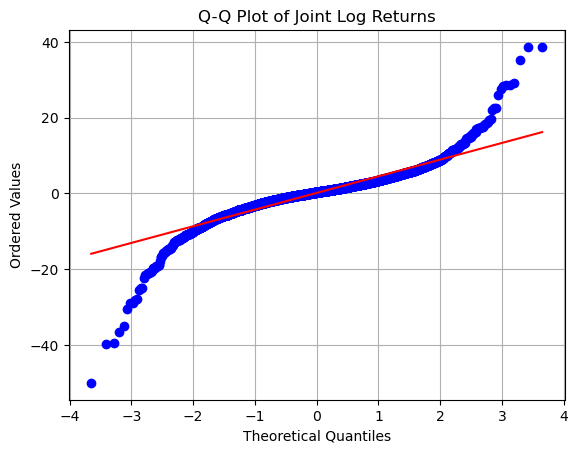

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing log returns with assets as columns and dates as rows

# Calculate the joint log returns by summing across the columns for each row
# This assumes equal weighting of each asset in the portfolio
joint_log_returns = log_returns.sum(axis=1)

# Now, generate the Q-Q plot for the joint log returns
stats.probplot(joint_log_returns, dist="norm", plot=plt)

plt.title('Q-Q Plot of Joint Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

plt.show()


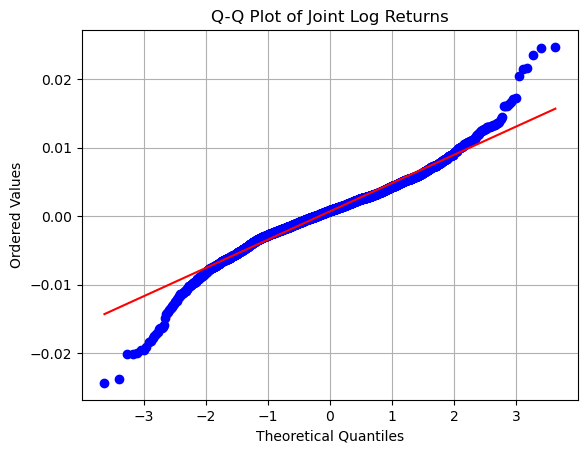

In [39]:
# Now, generate the Q-Q plot for the joint log returns
stats.probplot(final_log_returns[0, :], dist="norm", plot=plt)

plt.title('Q-Q Plot of Joint Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

plt.show()

In [6]:
import numpy as np
import pandas as pd

# Assuming 'log_returns' is your DataFrame of log returns for each stock

# Step 1: Convert log returns to simple returns
simple_returns = np.exp(log_returns) - 1

# Step 2: Calculate the average daily simple return for the equally weighted portfolio
n = simple_returns.shape[1]  # Number of stocks
average_daily_simple_returns = simple_returns.mean(axis=1)

# Step 3: Convert the daily simple returns of the portfolio back to log returns
portfolio_log_returns = np.log(1 + average_daily_simple_returns)


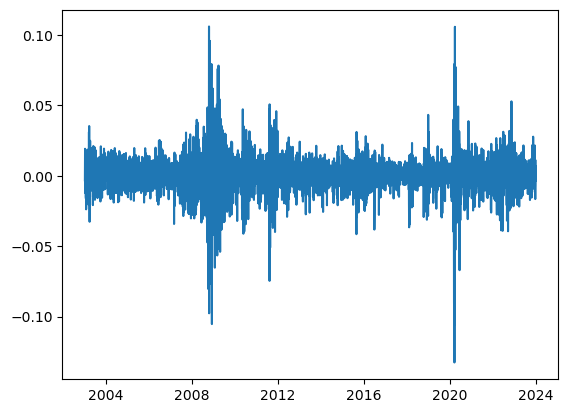

In [8]:
plt.plot(portfolio_log_returns)

In [18]:
import pandas as pd
import numpy as np

batch_size = 64

# Calculate the indices for splitting
train_end = int(len(standardized_log_returns) * 0.75)
val_end = int(len(standardized_log_returns) * 0.875)  # Additional 12.5% for validation, totaling 87.5% for train+val
test_end = len(standardized_log_returns)


train_end -= train_end % batch_size
val_end -= val_end % batch_size
test_end -= test_end % batch_size

# Split the data
train_data = standardized_log_returns.iloc[:train_end]
validation_data = standardized_log_returns.iloc[train_end:val_end]
test_data = standardized_log_returns.iloc[val_end:test_end]

print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)
print("Test Data Shape:", test_data.shape)


Training Data Shape: (3776, 370)
Validation Data Shape: (640, 370)
Test Data Shape: (640, 370)


In [10]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import pandas as pd
import numpy as np

batch_size = 128

# Calculate the indices for splitting
train_end = int(len(standardized_log_returns) * 0.75)
val_end = int(len(standardized_log_returns) * 0.875)  # Additional 12.5% for validation, totaling 87.5% for train+val
test_end = len(standardized_log_returns)

train_end -= train_end % batch_size
val_end -= val_end % batch_size
test_end -= test_end % batch_size

# Split the data
train_data = standardized_log_returns.iloc[:train_end]
validation_data = standardized_log_returns.iloc[train_end:val_end]
test_data = standardized_log_returns.iloc[val_end:test_end]

# Function to convert DataFrame into a 1D PyTorch tensor
def df_to_1d_tensor(df):
    # Flatten the DataFrame to 1D and convert to a PyTorch tensor
    flattened = df.values.flatten(order = 'F')  # Flatten the DataFrame to 1D, order = "F" (Fortran Style) to keep columns intact
    tensor = torch.tensor(flattened, dtype=torch.float32).to(device)  # Convert to tensor and send to device
    return tensor

# Convert each DataFrame into a 1D tensor
train_tensor = df_to_1d_tensor(train_data)
validation_tensor = df_to_1d_tensor(validation_data)
test_tensor = df_to_1d_tensor(test_data) # note that we do not care for modifying the data to have perfect batches since we will drop the last incomplete batch anyway

# At this point, train_tensor, validation_tensor, and test_tensor are 1D tensors
# containing the sequential days for each stock, one after the other

# Now, to create DataLoader instances, first create TensorDatasets
train_dataset = TensorDataset(train_tensor)
validation_dataset = TensorDataset(validation_tensor)
test_dataset = TensorDataset(test_tensor)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# Note: Since the data is now 1D, each "batch" is just a chunk of this 1D tensor
# If you have specific structuring needs for batches (e.g., keeping all data from one stock together),
# you may need to adjust how you're batching in the DataLoader or preprocess the data differently.



In [11]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

In [12]:
import torch
from torch import nn
from torch.nn import functional as F


# Encoder Module
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc_mean = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

    def forward(self, x):
        h = F.gelu(self.fc1(x))
        h = F.gelu(self.fc2(h))
        return self.fc_mean(h), self.fc_logvar(h)
    
# Decoder Module
class Decoder(nn.Module):
    def __init__(self, output_dim, latent_dim):
        super(Decoder, self).__init__()
        
        self.fc1 = nn.Linear(latent_dim, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, z):
        h = F.gelu(self.fc1(z))
        h = F.gelu(self.fc2(h))
        return self.fc3(h)
    
# VAE 
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(input_dim, latent_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu ** 2 - logvar.exp())
    return  100 * MSE + KLD # there is a weight/regularizer for KLD. We can also penalize MSE instead

# This loss function outputs individual losses too
# def loss_function(recon_x, x, mu, logvar):
#     MSE = F.mse_loss(recon_x, x, reduction='sum')
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return (5 * MSE + KLD), MSE, KLD

In [13]:
# Hyperparameters
input_dim = 128  # Adjust based on your time series length
latent_dim = 16  # Adjust based on desired complexity of the latent space

model = VAE(input_dim, latent_dim)
optimizer = torch.optim.AdamW(model.parameters(), lr=.0001)
model.to(device)

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=128, out_features=64, bias=True)
    (fc2): Linear(in_features=64, out_features=32, bias=True)
    (fc_mean): Linear(in_features=32, out_features=16, bias=True)
    (fc_logvar): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=16, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=64, bias=True)
    (fc3): Linear(in_features=64, out_features=128, bias=True)
  )
)

In [23]:
import datetime
import torch

epochs = 50 # the Larger the model, it seems that there is so much data that we don't need to train for too long
best_val_loss = float('inf')  # Initialize best validation loss to infinity
best_epoch = 0  # Initialize best epoch

train_losses = []
validation_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        inputs = data[0].to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(inputs)
        loss = loss_function(recon_batch, inputs, mu, logvar)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for data in validation_loader:
            inputs = data[0].to(device)
            recon_batch, mu, logvar = model(inputs)
            loss = loss_function(recon_batch, inputs, mu, logvar)
            validation_loss += loss.item()
            
    validation_loss /= len(validation_loader.dataset)
    validation_losses.append(validation_loss)

    # Check if this is the best model based on validation loss
    if validation_loss < best_val_loss:
        best_val_loss = validation_loss
        best_epoch = epoch
        best_model_state = model.state_dict()  # Update the best model's state dictionary
        print(f'New best model found at epoch {epoch}')

    if epoch % 10 == 0:
        print(f'---Epoch: {epoch}---')
        print(f'Training Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}')

New best model found at epoch 0
---Epoch: 0---
Training Loss: 91.5282, Validation Loss: 118.4702
New best model found at epoch 1
New best model found at epoch 2
New best model found at epoch 3
New best model found at epoch 4
New best model found at epoch 5
New best model found at epoch 6
New best model found at epoch 7
New best model found at epoch 8
New best model found at epoch 9
New best model found at epoch 10
---Epoch: 10---
Training Loss: 60.0033, Validation Loss: 110.6184
New best model found at epoch 11
New best model found at epoch 12
New best model found at epoch 13
New best model found at epoch 14
New best model found at epoch 15
New best model found at epoch 16
New best model found at epoch 17
New best model found at epoch 18
New best model found at epoch 19
New best model found at epoch 20
---Epoch: 20---
Training Loss: 56.9586, Validation Loss: 108.4321
New best model found at epoch 21
New best model found at epoch 22
New best model found at epoch 23
New best model found 

In [24]:
if best_model_state is not None:
    # Current date and time
    now = datetime.datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
    
    # Define your base path
    base_path = "states/"

    # Check if the directory exists, create it if it doesn't
    os.makedirs(base_path, exist_ok=True)
    
    # Combine base path with dynamically generated file name
    filename = f"best_model_{date_time}_epoch{best_epoch}_loss{best_val_loss:.4f}.pth"
    path = base_path + filename
    
    # Save the best model state
    torch.save(best_model_state, path)
    print(f'Saved best model to {path}')
else:
    print("No best model to save.")


Saved best model to states/best_model_20240410_040503_epoch49_loss107.3928.pth


In [14]:
model.load_state_dict(torch.load('states/best_model_20240410_040503_epoch49_loss107.3928.pth'))
model = model.to(device)  # Ensure the model is on the correct device

In [198]:
# After training, you can load the best model using:
if best_model_path:
    model.load_state_dict(torch.load(best_model_path))
    model = model.to(device)  # Ensure the model is on the correct device
    print(f"Loaded best model from {best_model_path}")

Loaded best model from states/20240406_015333_epoch72_model_weights.pth


In [57]:
reconstructions = [torch.tensor(recon) for recon in reconstructions]

In [64]:
# Ensuring all tensors in the list are at least 1D
reconstructions_reshaped = [recon.view(-1) for recon in reconstructions]

# Now attempt concatenation again
reconstructions_2d = torch.cat(reconstructions_reshaped, dim=0).reshape(-1, num_stocks).numpy()


did not test below code yet

In [ ]:
import torch

# Assuming reconstructions is a list of arrays/tensors to be reshaped and concatenated
# Ensure each item is a tensor and reshape to 1D
reconstructions = [torch.tensor(recon, dtype=torch.float32).view(-1) for recon in reconstructions]

# Concatenate along the first dimension to create a single tensor
reconstructions_concat = torch.cat(reconstructions, dim=0)

# Assuming 'days_per_stock' is the total number of days for each stock
# and 'num_stocks' is the total number of stocks you're working with
num_stocks = len(reconstructions)
days_per_stock = reconstructions_concat.shape[0] // num_stocks

# Reshape the concatenated tensor to 2D with each stock's days followed by the next stock's days
reconstructions_2d = reconstructions_concat.view(num_stocks, days_per_stock).t().numpy()

# 'reconstructions_2d' now has shape [days_per_stock, num_stocks], matching the expected structure


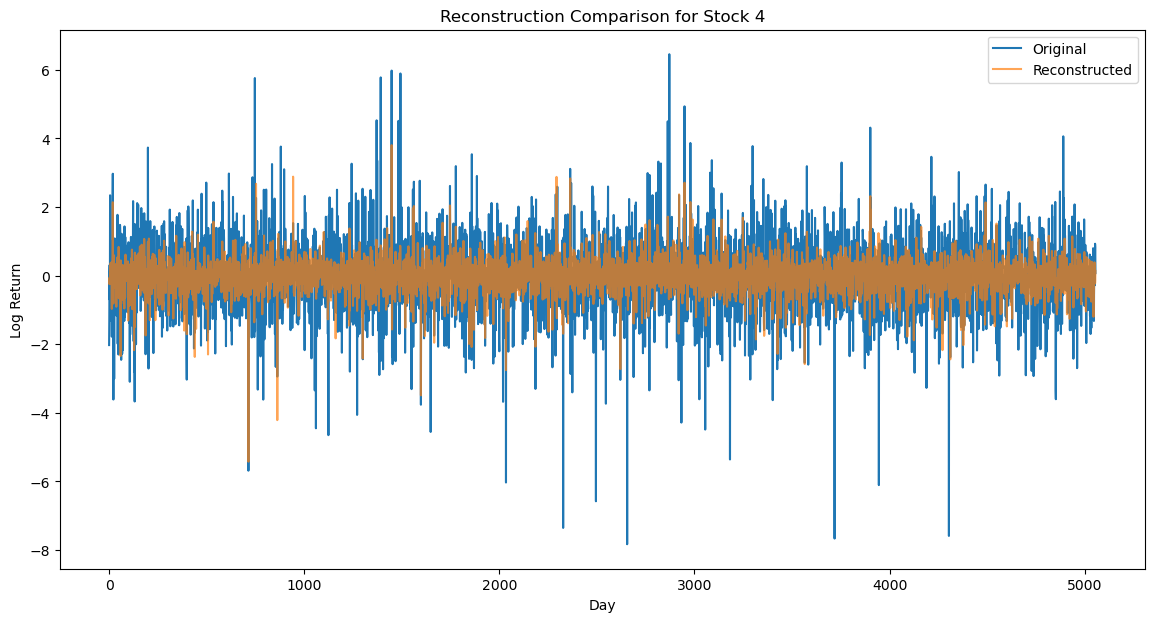

In [68]:
# Assuming the total number of days per stock is 5056
days_per_stock = 5056

# Calculate the number of stocks based on the length of the originals (or reconstructions)
# and the known number of days per stock
num_stocks = originals.shape[0] // days_per_stock


# Reshape originals and reconstructions back to 2D (days x stocks)
originals_2d = originals.reshape(days_per_stock, num_stocks)
#reconstructions_2d = torch.cat(reconstructions, dim=0).numpy().reshape(days_per_stock, num_stocks)

# Now originals_2d and reconstructions_2d are 2D arrays where each column represents a stock
# and each row represents a day, allowing you to compare the reconstructed data
# to the original data on a per-stock basis.

# Example comparison: Calculate the Mean Squared Error (MSE) between the originals and reconstructions
#mse_per_stock = ((originals_2d - reconstructions_2d)**2).mean(axis=0)
#print("MSE per stock:", mse_per_stock)

# You can also visualize the reconstruction for specific stocks if needed
import matplotlib.pyplot as plt

stock_index = 3  # Example: First stock
plt.figure(figsize=(14, 7))
plt.plot(originals_2d[:, stock_index], label='Original')
plt.plot(reconstructions_2d[:, stock_index], label='Reconstructed', alpha=0.7)
plt.title(f'Reconstruction Comparison for Stock {stock_index + 1}')
plt.xlabel('Day')
plt.ylabel('Log Return')
plt.legend()
plt.show()


In [ ]:
# 11 secs below

In [15]:
import torch

# Assuming 'train_loader' is your DataLoader for the training set
model.eval()
mus, logvars = [], []
with torch.no_grad():
    for data in train_loader:
        data = data[0]  # Assuming data[0] contains your input features
        mu, logvar = model.encoder(data)
        mus.append(mu)
        logvars.append(logvar)

In [16]:
# Assuming mus and logvars are lists of tensors
all_mus = torch.cat(mus, dim=0)
all_logvars = torch.cat(logvars, dim=0)


In [28]:
train_length = len(train_loader)

In [17]:
import numpy as np
import torch

# Let's assume mus is a list of Tensors, each of shape [8]
# Convert mus into a single NumPy array
mus_array = torch.stack(mus).cpu().numpy()  # Shape [21889, 8]
logvars_array = torch.stack(logvars).cpu().numpy()

# Number of stocks and batches per stock
num_stocks = 370
train_length = len(train_loader)
batches_per_stock = train_length // num_stocks
L = 16
# Reshape mus_array to have a single column for each stock, with concatenated mu values for all days
# First, ensure mus_array is reshaped to [371, 59 * 8]
mus_reshaped = mus_array.reshape(num_stocks, batches_per_stock * L).T  # Transpose to get [29 * 16, 370]
logvars_reshaped = logvars_array.reshape(num_stocks, batches_per_stock * L).T  # Transpose to get [29 * 16, 370]

# Now, mus_reshaped is a matrix with 59 * 8 rows and 371 columns, as desired


In [ ]:
# below are sanity checks

In [30]:
mus_reshaped.shape

(464, 370)

In [31]:
mus_reshaped[0:8, 1]

array([-1.0230671 ,  2.327347  ,  2.3210773 ,  0.9415939 ,  1.9822563 ,
        1.1279733 ,  0.13531536, -1.2620513 ], dtype=float32)

In [32]:
standardized_log_returns.shape

(5105, 370)

In [145]:
import torch
import numpy as np
import random

num_samples = 100  # Number of Monte Carlo samplings
num_stocks = 370   # Total number of stocks
num_days = test_end    # Total number of days
mus_length = mus_reshaped.shape[0]  # Length of mus for each stock
num_batches = num_days // output_dim
output_dim = 128
latent_dim = 16
# Preallocate tensor for z samples without including latent_dim in its shape
z_samples_all = torch.empty((num_samples, num_stocks, num_batches, latent_dim))

for n in range(num_samples):
    for stock in range(num_stocks):
        for batch in range(num_batches):
            z = torch.empty(latent_dim)
            for i in range(latent_dim):
                # Select a random index within the 59 * 8 mu values for the current stock
                random_index = random.randint(0, mus_length - 1)
                selected_mu = mus_reshaped[random_index, stock]
                selected_logvar = logvars_reshaped[random_index, stock]
                
                # Convert selected_mu and selected_logvar to tensors
                selected_mu_tensor = torch.tensor(selected_mu, dtype=torch.float32)
                selected_logvar_tensor = torch.tensor(selected_logvar, dtype=torch.float32)
    
                # Reparameterization trick to sample z
                std = torch.exp(0.5 * selected_logvar_tensor)
                eps = torch.randn_like(std)
    
                # Append the sampled z for this day to the stock-specific list
                z[i] = selected_mu_tensor + eps * std

            # Convert the stock-specific samples list to a tensor and store in the corresponding slice of z_samples_all
            z_samples_all[n, stock, batch, :] = z


# Now, z_samples_all has shape [num_samples, num_days, num_stocks] and contains the simulated paths



/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_55431/2566480914.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  selected_mu_tensor = torch.tensor(selected_mu, dtype=torch.float32)
/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_55431/2566480914.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  selected_logvar_tensor = torch.tensor(selected_logvar, dtype=torch.float32)


In [18]:
# Optimized Version
import torch
import numpy as np

# Assumed Setup
num_samples = 100  # Number of Monte Carlo samplings
num_stocks = 370   # Total number of stocks
num_days = 4992   # Total number of days
latent_dim = 16
batches_per_stock = train_length // num_stocks
mus_length = batches_per_stock * latent_dim  # Length of mus for each stock
output_dim = 128
num_batches = num_days // output_dim


# Convert NumPy arrays to PyTorch tensors and ensure they are of type float
mus_reshaped = torch.from_numpy(mus_reshaped).float()
logvars_reshaped = torch.from_numpy(logvars_reshaped).float()

# Initialize the tensor for z samples
z_samples_all = torch.empty((num_samples, num_stocks, num_batches, latent_dim))

# Generate random indices for each stock, but keep the stock-specific selection
random_indices = torch.randint(0, mus_length, (num_samples, num_stocks, num_batches, latent_dim))

# Since mus_reshaped and logvars_reshaped are now tensors, use these indices to select the appropriate mu and sigma
selected_mus = mus_reshaped[random_indices, torch.arange(num_stocks).unsqueeze(0).unsqueeze(2).unsqueeze(3).expand(num_samples, -1, num_batches, latent_dim)]
selected_logvars = logvars_reshaped[random_indices, torch.arange(num_stocks).unsqueeze(0).unsqueeze(2).unsqueeze(3).expand(num_samples, -1, num_batches, latent_dim)]

# Apply the reparameterization trick for each stock
stds = torch.exp(0.5 * selected_logvars)
eps = torch.randn_like(stds)
zs = selected_mus + eps * stds

# Assign the sampled zs
z_samples_all = zs



In [19]:
# optimized version
# Assuming the model and z_samples_all are defined and initialized properly

num_samples, num_stocks, num_batches, latent_dim = z_samples_all.shape
output_dim = 128  # Given by the decoder for each latent_dim-sized input
decoded_dim = num_batches * output_dim  # 39 * 128 = 4992, total decoded output length per stock

# Initialize tensor to hold decoded data
decoded_data = torch.empty((num_samples, num_stocks, decoded_dim), dtype=torch.float32)

for n in range(num_samples):
    for stock in range(num_stocks):
        # Select all batches for the current stock in the current sample
        z_stock = z_samples_all[n, stock, :, :].unsqueeze(1).to(device)  # Ensure it has the correct shape for the decoder

        with torch.no_grad():
            # Decode all batches at once
            decoded_stock = model.decoder(z_stock)

        # Flatten the decoded output and store it in the decoded_data tensor
        decoded_data[n, stock, :] = decoded_stock.view(-1)

# Now, decoded_data is optimized and has the shape [num_samples, num_stocks, 5056]


In [146]:
num_samples, num_stocks, num_batches, latent_dim = z_samples_all.shape
output_dim = 128  # Given by the decoder for each latent_dim-sized input
decoded_dim = num_batches * output_dim  # 79 * 64 = 5056, total decoded output length per stock

# Initialize tensor to hold decoded data
decoded_data = torch.empty((num_samples, num_stocks, decoded_dim), dtype=torch.float32)

# Iterate through the samples and stocks to decode each batch of latent variables
for n in range(num_samples):
    for stock in range(num_stocks):
        # Initialize a placeholder for the decoded sequences for the current stock in the current sample
        decoded_sequence = torch.empty((num_batches, output_dim), dtype=torch.float32)
        
        for batch in range(num_batches):
            z_batch = z_samples_all[n, stock, batch, :].unsqueeze(0)  # Add batch dimension for decoding
            
            # Decode the current batch
            with torch.no_grad():
                decoded_batch = model.decoder(z_batch)
            
            # Store the decoded batch in the decoded_sequence tensor
            decoded_sequence[batch, :] = decoded_batch.squeeze(0)  # Remove batch dimension after decoding
        
        # Flatten the decoded_sequence tensor to fit into the decoded_data tensor
        decoded_data[n, stock, :] = decoded_sequence.view(-1)

# Now, decoded_data is ready and has shape [num_samples, num_stocks, 5056]


In [39]:
decoded_data.shape

torch.Size([100, 370, 4992])

In [ ]:
# Assuming 'decoded_data' is a PyTorch tensor of standardized log returns
# and 'log_returns' is your original DataFrame of log returns used to calculate rolling mean and std

import torch

rolling_window_size = 180

# Recalculate EWMA mean and std if not already done so
rolling_mean = log_returns.ewm(span=rolling_window_size, adjust=False).mean()
rolling_std = log_returns.ewm(span=rolling_window_size, adjust=False).std()

# Prepare the data (dropping NaNs is optional based on how you handle initial values)
rolling_mean = rolling_mean.iloc[rolling_window_size-1:, :]  # Aligning with the length of 'decoded_data'
rolling_std = rolling_std.iloc[rolling_window_size-1:, :]

# Convert to NumPy arrays
rolling_mean = rolling_mean.to_numpy()
rolling_std = rolling_std.to_numpy()

# Convert to PyTorch tensors and transpose to match [stocks, days]
rolling_mean_tensor = torch.tensor(rolling_mean, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)
rolling_std_tensor = torch.tensor(rolling_std, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)

# Destandardize
destandardized_samples = (decoded_data * rolling_std_tensor.unsqueeze(0)) + rolling_mean_tensor.unsqueeze(0)


In [20]:
rolling_window_size = 180

# Calculate rolling mean and standard deviation for each stock
rolling_mean = log_returns.rolling(window=rolling_window_size).mean()
rolling_std = log_returns.rolling(window=rolling_window_size).std()

rolling_mean = rolling_mean.dropna()
rolling_std = rolling_std.dropna()

rolling_mean = rolling_mean.iloc[:test_end, :]
rolling_std = rolling_std.iloc[:test_end, :]

rolling_mean = rolling_mean.to_numpy()
rolling_std = rolling_std.to_numpy()

# Convert to PyTorch tensors and transpose to match [stocks, days]
rolling_mean = torch.tensor(rolling_mean, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)
rolling_std = torch.tensor(rolling_std, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)

# Destandardize
destandardized_samples = (decoded_data * rolling_std.unsqueeze(0)) + rolling_mean.unsqueeze(0)

In [206]:
# Convert to PyTorch tensors and transpose to match [stocks, days]
rolling_mean = torch.tensor(rolling_mean, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)
rolling_std = torch.tensor(rolling_std, dtype=torch.float32, device=decoded_data.device).transpose(0, 1)

# Destandardize
destandardized_samples = (decoded_data * rolling_std.unsqueeze(0)) + rolling_mean.unsqueeze(0)

In [169]:
destandardized_samples[0, 0, :]

tensor([-0.0022,  0.0013,  0.0070,  ..., -0.0028, -0.0007, -0.0020])

In [41]:
destandardized_samples.shape

torch.Size([100, 370, 4992])

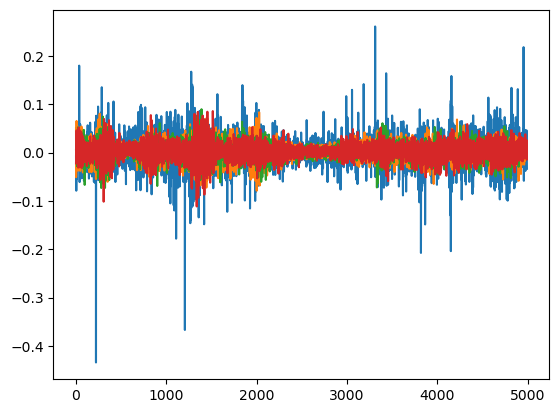

In [42]:
plt.plot(log_returns.iloc[179:179 + test_end, 250].values)
plt.plot(destandardized_samples[0, 250, :])
plt.plot(destandardized_samples[1, 250, :])
plt.plot(destandardized_samples[2, 250, :])

In [22]:
final_log_returns.shape

torch.Size([100, 4992])

In [28]:
import torch

# Assuming destandardized_samples is a PyTorch tensor with shape [n_samples, n_stocks, total_days]
# And weights_vector is a PyTorch tensor with shape [n_stocks]

# Reshape weights_vector to match the dimensions for matmul: [n_stocks, 1]
weights_tensor = torch.tensor(weights_vector).view(-1, 1)

destandardized_samples_permuted = destandardized_samples.permute(0, 2, 1)

# Ensure that both tensors are of the same data type
destandardized_samples_permuted = destandardized_samples_permuted.float()
weights_tensor = weights_tensor.float()

# Now perform the matrix multiplication
weighted_samples = torch.matmul(destandardized_samples_permuted, weights_tensor)

# Squeeze the last dimension to get the final result of shape [n_samples, total_days]
final_log_returns = weighted_samples.squeeze(-1)



In [ ]:
# Optimized, not tested
import torch

# Assuming destandardized_samples is a PyTorch tensor with shape [n_samples, n_stocks, total_days]
# And weights_vector is a PyTorch tensor with shape [n_stocks]

# Ensure both tensors are of the same data type (float)
destandardized_samples = destandardized_samples.float()
weights_vector = weights_vector.float().unsqueeze(1)  # Add singleton dimension for matrix multiplication

# Use batch matrix multiplication (bmm) to efficiently multiply across dimensions
# First, ensure weights_vector is [n_stocks, 1] by adding an extra dimension
weights_vector = weights_vector.unsqueeze(-1)

# Now, perform the multiplication. Since we want to multiply and sum across the n_stocks dimension,
# we need to transpose the last two dimensions of destandardized_samples to bring n_stocks to the end
final_log_returns = torch.bmm(destandardized_samples.transpose(1, 2), weights_vector).squeeze(-1)

# final_log_returns now has shape [n_samples, total_days]


In [ ]:
# assume equal weights here
import torch

# Define functions
def log_returns_to_simple(log_returns):
    return torch.exp(log_returns) - 1

def simple_to_log_returns(simple_returns):
    return torch.log(1 + simple_returns)

# Perform calculations
simple_returns = log_returns_to_simple(destandardized_samples)  # [n_samples, n_stocks, total_days]
daily_average_returns = torch.mean(simple_returns, dim=1)  # [n_samples, total_days]
final_log_returns = simple_to_log_returns(daily_average_returns)  # [n_samples, total_days]


In [50]:
import numpy as np

# Assuming decoded_samples, rolling_means, and rolling_stds have shapes:
# decoded_samples: [n_samples, n_stocks, total_days]
# rolling_means and rolling_stds: [n_stocks, total_days]

def destandardize(decoded_samples, rolling_means, rolling_stds):
    return decoded_samples * rolling_stds + rolling_means

def log_returns_to_simple(log_returns):
    return np.exp(log_returns) - 1

def simple_to_log_returns(simple_returns):
    return np.log(1 + simple_returns)

# Step 1: Destandardize the decoded samples
destandardized_samples = destandardize(decoded_samples, rolling_means, rolling_stds)

# Step 2: Convert the destandardized log returns to simple returns
simple_returns = log_returns_to_simple(destandardized_samples)

# Step 3: Calculate the daily average returns across all stocks
daily_average_returns = np.mean(simple_returns, axis=1)  # Averaging over the stock dimension

# Step 4: Convert the average simple returns back to log returns
final_log_returns = simple_to_log_returns(daily_average_returns)

# final_log_returns should have the shape [n_samples, total_days], as required


NameError: name 'decoded_samples' is not defined

In [212]:
import numpy as np
import time

tic = time.perf_counter()

# Define the rolling window size for VaR calculation and the confidence level
rolling_window_size = 180
confidence_level = 0.05  # 95% confidence

# Function to calculate the rolling VaR for one path
def calculate_rolling_var(path, window_size, confidence_level):
    # Initialize the array to store the VaR
    var_path = np.full(path.shape, np.nan)

    # Compute the VaR for each day using a rolling window
    for i in range(window_size, len(path)):
        window = path[i-window_size:i]
        var_path[i] = -np.percentile(window, confidence_level * 100)  # Negative sign for loss
    return var_path

# Calculate the VaR for each path
final_log_returns_np = final_log_returns.numpy()
var_paths = np.array([calculate_rolling_var(path, rolling_window_size, confidence_level) for path in final_log_returns_np])

# Calculate the average VaR across all paths
average_var = np.nanmean(var_paths, axis=0)  # Ignore the NaNs from the start of the series
worst_case_var = np.nanmax(var_paths, axis=0)

# average_var now holds the average VaR at each day across all simulated paths
toc = time.perf_counter()
print(toc - tic)

23.46568289992865


/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_55431/2370615838.py:26: RuntimeWarning: Mean of empty slice
  average_var = np.nanmean(var_paths, axis=0)  # Ignore the NaNs from the start of the series
/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_55431/2370615838.py:27: RuntimeWarning: All-NaN slice encountered
  worst_case_var = np.nanmax(var_paths, axis=0)


In [30]:
import numpy as np
import time

def rolling_window(a, window):
    """Create a rolling window view of the array 'a' with a given window size."""
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

def calculate_rolling_var_optimized(all_paths, window_size, confidence_level):
    """Calculate the rolling VaR for all paths using optimized methods."""
    num_paths, num_points = all_paths.shape
    var_paths = np.full(all_paths.shape, np.nan)  # Initialize the Var array
    
    # Use a rolling window view for each path
    for path_idx in range(num_paths):
        rolling_views = rolling_window(all_paths[path_idx], window_size)
        var_paths[path_idx, window_size-1:] = -np.percentile(rolling_views, confidence_level * 100, axis=1)
        
    # Calculate the average and worst-case VaR across all paths
    average_var = np.nanmean(var_paths, axis=0)  # Average VaR
    worst_case_var = np.nanmax(var_paths, axis=0)  # Worst-case VaR
    
    return average_var, worst_case_var

# Example usage
tic = time.perf_counter()

# Define the rolling window size for VaR calculation and the confidence level
rolling_window_size = 180
confidence_level = 0.05  # 95% confidence

final_log_returns_np = final_log_returns.numpy()

# Optimize VaR calculation
average_var, worst_case_var = calculate_rolling_var_optimized(final_log_returns_np, rolling_window_size, confidence_level)

toc = time.perf_counter()
print(f"Optimized calculation time: {toc - tic} seconds")

Optimized calculation time: 1.0120028145611286 seconds


/tmp/ipykernel_2258631/3933897756.py:21: RuntimeWarning: Mean of empty slice
  average_var = np.nanmean(var_paths, axis=0)  # Average VaR
/tmp/ipykernel_2258631/3933897756.py:22: RuntimeWarning: All-NaN slice encountered
  worst_case_var = np.nanmax(var_paths, axis=0)  # Worst-case VaR


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pandas Series 'returns' with your daily returns
confidence_level = 0.95
rolling_window_size = 180  # Adjust as needed, considering you're looking at 1-day ahead VaR

aligned_returns = pd.Series(portfolio_returns[179:179+test_end])
# Calculate the rolling VaR (95% confidence)
rolling_VaR_95 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)
# rolling_reconstructed_VaR_95 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)

# # Calculate the rolling VaR (99% confidence)
# rolling_VaR_99 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)
# rolling_reconstructed_VaR_99 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)

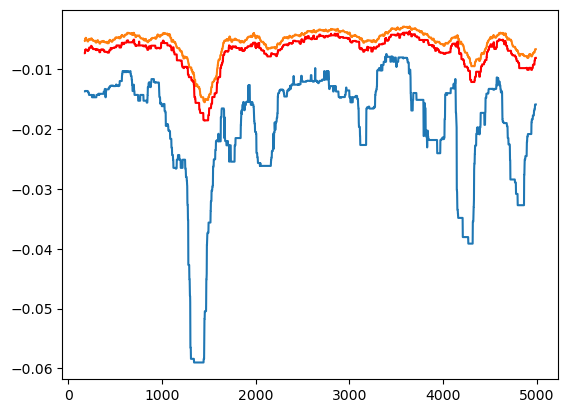

In [35]:
x_index = range(4992)
plt.plot(x_index,rolling_VaR_95)
plt.plot(x_index, -average_var)
plt.plot(x_index, -worst_case_var, color = 'red')

In [392]:
actual_returns_min = SPY_returns.min()
actual_returns_max = SPY_returns.max()
actual_returns_normalized = (SPY_returns - actual_returns_min) / (actual_returns_max - actual_returns_min)


reconstructed_returns_min = flat_latent_samples.min()
reconstructed_returns_max = flat_latent_samples.max()
reconstructed_returns_normalized = (flat_latent_samples - reconstructed_returns_min) / (reconstructed_returns_max - reconstructed_returns_min)

<Axes: xlabel='Close', ylabel='Density'>

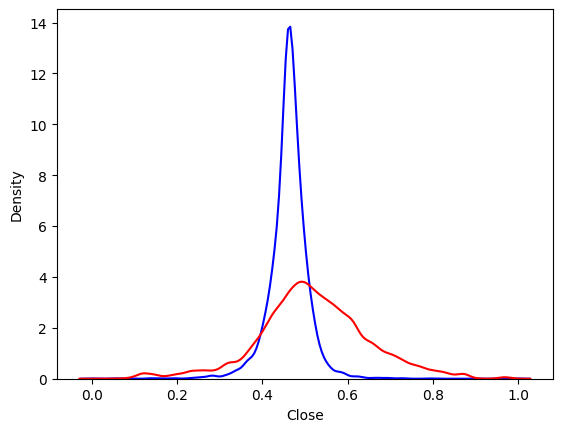

In [393]:
sns.kdeplot(actual_returns_normalized, label="Input Standardized Returns", color='blue')
sns.kdeplot(reconstructed_returns_normalized, label="VAE Returns", color='red')

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `mu_tensor` and `logvar_tensor` are your aggregated mu and logvar tensors from the VAE

# Step 1: Sample points from the latent distributions
# Calculate standard deviation from logvar
std_tensor = torch.exp(0.5 * all_logvars)
# Number of samples you want to generate from each latent distribution
num_samples = 1000
# Initialize a tensor to hold all the generated samples
latent_samples = torch.zeros(num_samples, all_mus.size(0))

# Use the reparameterization trick to sample from the latent distributions
for i in range(all_mus.size(0)):
    eps = torch.randn(num_samples)
    latent_samples[:, i] = all_mus[i] + eps * std_tensor[i]

# Flatten the latent_samples to get a 1D array of samples
flat_latent_samples = latent_samples.view(-1).numpy()

# Step 2: Use the actual standardized training data
# Assuming `standardized_data` is a 1D numpy array of your standardized training data
# flat_standardized_data = standardized_data.reshape(-1)  # If your data is not already flat

# Step 3: Apply KDE to both distributions
sns.kdeplot(flat_latent_samples, label="VAE's output", color='red')
sns.kdeplot(train_data, label="Input Standardized Returns", color='blue')

# Step 4: Plot the KDEs together
plt.title('Kernel Density Estimation Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [137]:
portfolio_log_returns[179:179+test_end]

Date
2013-08-26   -0.002779
2013-08-27   -0.016026
2013-08-28   -0.001277
2013-08-29    0.004734
2013-08-30   -0.004657
                ...   
2023-10-19   -0.012890
2023-10-20   -0.013459
2023-10-23   -0.007766
2023-10-24    0.008094
2023-10-25   -0.016202
Length: 2560, dtype: float64

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pandas Series 'returns' with your daily returns
confidence_level = 0.95
rolling_window_size = 180  # Adjust as needed, considering you're looking at 1-day ahead VaR

aligned_returns = portfolio_log_returns[179:179+test_end]
# Calculate the rolling VaR (95% confidence)
rolling_VaR_95 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)
# rolling_reconstructed_VaR_95 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)

# # Calculate the rolling VaR (99% confidence)
# rolling_VaR_99 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)
# rolling_reconstructed_VaR_99 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)

In [49]:
dates = standardized_log_returns.index[0:test_end]

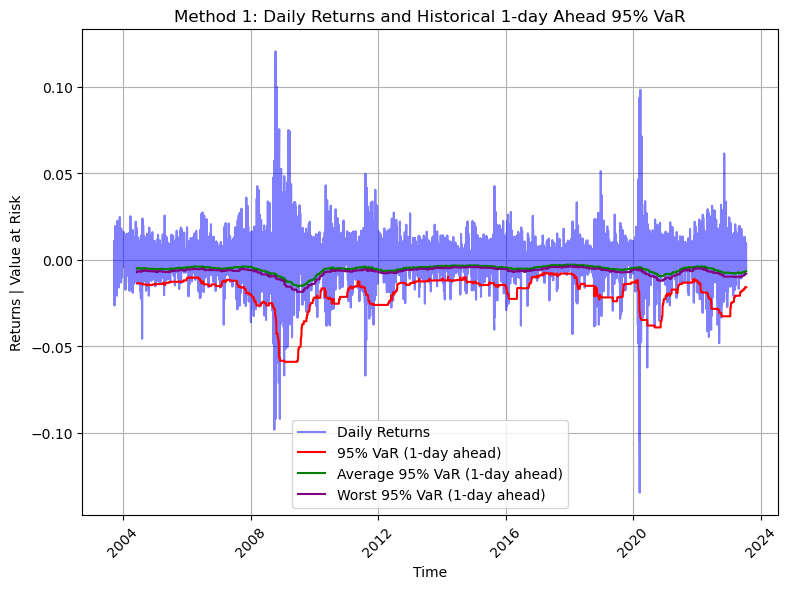

In [51]:
x_index = range(4992)
# Plotting
plt.figure(figsize=(8, 6))

# Plot returns
plt.plot(dates, aligned_returns, label='Daily Returns', color='blue', alpha=0.5)

# Plot VaR
plt.plot(dates, rolling_VaR_95, label='95% VaR (1-day ahead)', color='red', linestyle='-')
plt.plot(dates, - average_var, label='Average 95% VaR (1-day ahead)', color='green', linestyle='-')
plt.plot(dates, - worst_case_var, label='Worst 95% VaR (1-day ahead)', color='purple', linestyle='-')


plt.title('Method 1: Daily Returns and Historical 1-day Ahead 95% VaR')
plt.xlabel('Time')
plt.ylabel('Returns | Value at Risk')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
# Optional: To improve layout, especially for tight figures
plt.tight_layout()
plt.savefig("Method 1: VaR.png", dpi = 300)
plt.show()

In [45]:
test_dates = standardized_log_returns.index[val_end:test_end]

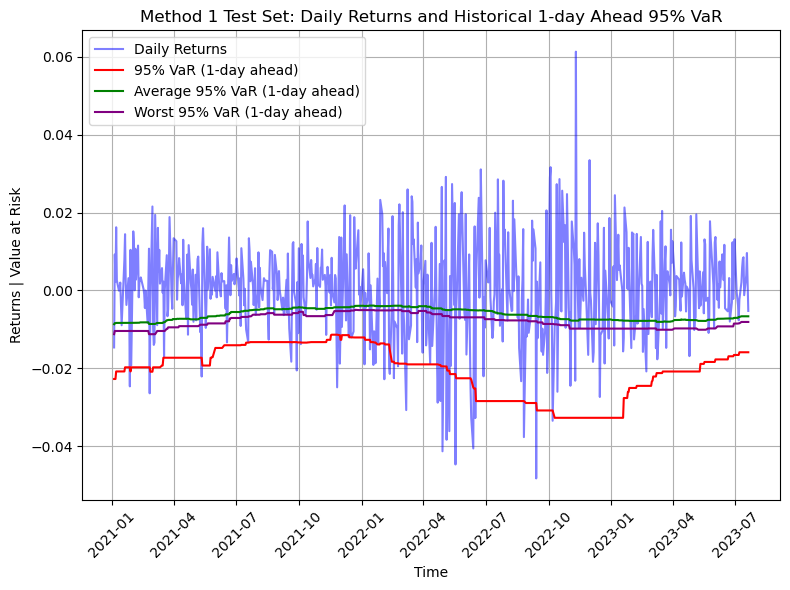

In [52]:
x_index = np.arange(val_end, test_end)

# Plotting
plt.figure(figsize=(8, 6))

# Plot returns
plt.plot(test_dates, aligned_returns[val_end:test_end], label='Daily Returns', color='blue', alpha=0.5)

# Plot VaR
plt.plot(test_dates, rolling_VaR_95[val_end:test_end], label='95% VaR (1-day ahead)', color='red', linestyle='-')
plt.plot(test_dates, - average_var[val_end:test_end], label='Average 95% VaR (1-day ahead)', color='green', linestyle='-')
plt.plot(test_dates, - worst_case_var[val_end:test_end], label='Worst 95% VaR (1-day ahead)', color='purple', linestyle='-')


plt.title('Method 1 Test Set: Daily Returns and Historical 1-day Ahead 95% VaR')
plt.xlabel('Time')
plt.ylabel('Returns | Value at Risk')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
# Optional: To improve layout, especially for tight figures
plt.tight_layout()
plt.savefig("Method 1 Test Set: VaR.png", dpi = 300)
plt.show()

In [53]:
# Regulatory Loss Function (RQLt)
RQLt = np.where(aligned_returns[val_end:test_end] < rolling_VaR_95[val_end:test_end], 1 + (rolling_VaR_95[val_end:test_end] - aligned_returns[val_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt = np.abs(aligned_returns[val_end:test_end] - rolling_VaR_95[val_end:test_end])

# Quadratic Loss Function (QLt)
QLt = (aligned_returns[val_end:test_end] - rolling_VaR_95[val_end:test_end]) ** 2

In [54]:
# Regulatory Loss Function (RQLt)
RQLt_vae = np.where(aligned_returns[val_end:test_end] < -  average_var[val_end:test_end], 1 + (- average_var[val_end:test_end] - aligned_returns[val_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt_vae = np.abs(aligned_returns[val_end:test_end] -  - average_var[val_end:test_end])

# Quadratic Loss Function (QLt)
QLt_vae = (aligned_returns[val_end:test_end] -  - average_var[val_end:test_end]) ** 2

In [55]:
# Regulatory Loss Function (RQLt)
RQLt_worst = np.where(aligned_returns[val_end:test_end] < -  worst_case_var[val_end:test_end], 1 + (- worst_case_var[val_end:test_end] - aligned_returns[val_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt_worst = np.abs(aligned_returns[val_end:test_end] -  - worst_case_var[val_end:test_end])

# Quadratic Loss Function (QLt)
QLt_worst = (aligned_returns[val_end:test_end] -  - worst_case_var[val_end:test_end]) ** 2

In [56]:
np.sum(RQLt), np.sum(RQLt_vae), np.sum(RQLt_worst)

(33.00350671244797, 167.02442876288683, 130.02024136445237)

In [57]:
np.sum(LLt), np.sum(LLt_vae), np.sum(LLt_worst)

(13.984032508572966, 7.132247812196685, 7.765565363570462)

In [58]:
np.sum(QLt), np.sum(QLt_vae), np.sum(QLt_worst)

(0.4071268927867822, 0.12895372084720766, 0.14690662414646866)

In [60]:
breaches = aligned_returns[val_end:test_end] < rolling_VaR_95[val_end:test_end]

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(rolling_VaR_95[val_end:test_end]) * 0.05

num_breaches, expected_breaches

(33, 32.0)

In [61]:
breaches = aligned_returns[val_end:test_end] < - average_var[val_end:test_end]

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(aligned_returns[val_end:test_end]) * 0.05

num_breaches, expected_breaches

(167, 32.0)

In [62]:
breaches = aligned_returns[val_end:test_end] < - worst_case_var[val_end:test_end]

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(aligned_returns[val_end:test_end]) * 0.05

num_breaches, expected_breaches

(130, 32.0)

In [63]:
130 / len(aligned_returns[val_end:test_end]) 

0.203125

In [408]:
64 / len(aligned_returns[train_end:test_end]) 

0.05

In [264]:
100 / len(aligned_returns[train_end:test_end]) 

0.15625

In [ ]:
import torch

# Assuming model is your VAE and data_loader is your DataLoader
model.eval()  # Set the model to evaluation mode

reconstructions = []  # To store the reconstructions

with torch.no_grad():  # No gradients needed
    for data in train_loader:
        inputs = data[0].to(model.device)  # Ensure data is on the same device as the model
        # Forward pass through the model
        # Assuming the model returns reconstruction as the first output
        reconstruction, _, _ = model(inputs)
        reconstructions.append(reconstruction)

# Concatenate all batches of reconstructions
reconstructions = torch.cat(reconstructions, dim=0)

# If you need to convert reconstructions back to a numpy array:
# reconstructions_np = reconstructions.cpu().numpy()

# reconstructions now contains the reconstructed data


In [67]:
import torch

# Assuming model is your VAE and data_loader is your DataLoader
model.eval()  # Set the model to evaluation mode

reconstructions = []  # To store the reconstructions

with torch.no_grad():
    for data in train_loader:
        inputs = data[0]  # Ensure data is on the same device as the model, adjust if your DataLoader structure is different
        reconstruction, _, _ = model(inputs)  # Forward pass through the model
        reconstructions.append(reconstruction)

# Concatenate all batches of reconstructions
reconstructions = torch.cat(reconstructions, dim=0)

# Assuming reconstructions is now a flattened tensor [r_1,1, r_1,2, .., r_n,t]
# And you know the number of stocks (n) and total number of days (t)
n = 370  # Total number of stocks
t = train_data.shape[0]  # Total number of days

# Reshape the reconstructions to have n rows and t columns
# Note: Ensure that the total number of elements matches n*t
reconstructions = reconstructions.view(t, n)

# Now, reconstructions is a tensor with shape [n, t]
# If you need to convert it to a numpy array for further processing:
reconstructions_np = reconstructions.cpu().numpy()


/home/calebs/.conda/envs/thesis2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/calebs/.conda/envs/thesis2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


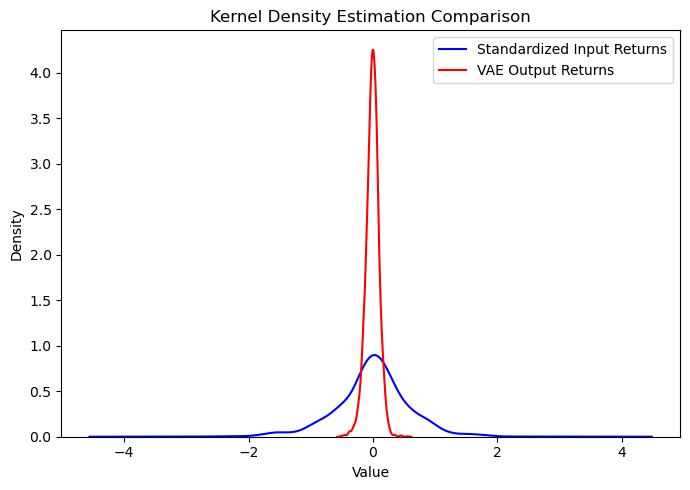

In [73]:
reconstructed_returns = np.dot(reconstructions_np, weights_vector)
standardized_train_returns = np.dot(train_data, weights_vector)

plt.figure(figsize=(7, 5))
sns.kdeplot(standardized_train_returns, label="Standardized Input Returns", color='blue')
sns.kdeplot(reconstructed_returns, label="VAE Output Returns", color='red')
# Add title and labels, and show the plot
plt.title('Kernel Density Estimation Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("Method 1 KDE.png", dpi = 300)
plt.show()
